### \#5

Use forward difference method to numerically solve the PDE. Plot the numer-
ical solution and the true solution. $\\$
$\begin{cases} \pi u_{t} = u_{xx} \\ u(x,0) = \text{cos}(\pi x) \text{for all } 0 \leq x \leq 1 \\ u(0,t) = e^{-\pi t} \text{for } 0 \leq t \leq 1 \\ u(1,t) = e^{-\pi t} \text{for } 0 \leq t \leq 1 \end{cases}$

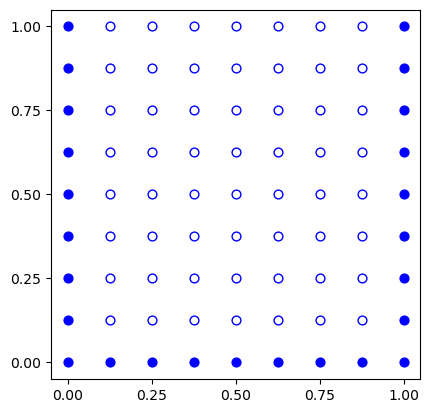

In [1]:
import matplotlib.pyplot as plt
import numpy as np

fig, ax = plt.subplots()

L = 1
T = 1
N = 8
K = 8
h = L/N
k = T/K

x = np.linspace(0, L, N+1)
t = np.linspace(0, L, N+1)
xx, tt = np.meshgrid(x, t)

# grid domain
gd = np.zeros((N+1, N+1))

gd[0, :] = 1
# gd[-1, :] = 1
gd[:, 0] = 1
gd[:, -1] = 1

"""#%% Add a stencil polygon
polygon_points = np.array([[-0.5*h, -0.5*k], [2.5*h, -0.5*k], 
        [2.5*h, 0.5*k],  [1.5*h, 0.5*k], [1.5*h, 1.5*k],
        [0.5*h, 1.5*k], [0.5*h, 0.5*k], [-0.5*h, 0.5*k]])
ax.add_patch(plt.Polygon(polygon_points, closed=True, fill=None, edgecolor='r'))
"""

ax.scatter(xx[gd==0], tt[gd==0], c='w', edgecolors='b', s=40)
ax.scatter(xx[gd==1], tt[gd==1], c='b', s=40)
ax.set_aspect('equal')
ax.set_xticks(x[::2])
ax.set_yticks(t[::2])

plt.show()

The true solution of this PDE is $u(x,t) = e^{- \pi t}\text{cos}(\pi x)$

In [1]:
# Forward Difference Method

import numpy as np
import matplotlib.pyplot as plt
plt.rcParams['font.size'] = 16

def fw_FDM(w, par):
    """
    Return the next time of the heat equation using forward difference method.
    
    Input:
        w: (1D array) Temperature distribution at time t.
        par: (dict) Parameter for the forward difference method.
    Output:
        w_new: (1D array) Temperature distribution at time t+1.
    """
    s = par['D']*par['k']/(par['h']*par['h'])

    w_new = np.zeros_like(w[1:-1])

    # Main line of the forward difference method
    w_new = w[1:-1] + s*(w[2:] - 2.*w[1:-1] + w[:-2])
    """
    This line is equivalent to the following for loop, but much faster.
    N = len(w)
    for i in range(1, N+1):
        w_new[i] = w[i] + s*(w[i-1] - 2*w[i] + w[i+1])
    """

    return w_new

In [2]:
# Function used to solve the heat equation using the forward difference method

def solve_heat_eq(ic, bc1, bc2, D, a, b, T, N, K, t0=0.):
    """
    Return numerical solution of Heat equation using forward difference method.
    
    Input:
        ic: (1D array) Initial temperature distribution.
        bc1: (float or 1D array) Boundary condition at x=a. Constant boundary condition is assumed.
        bc2: (float or 1D array) Boundary condition at x=b. Constant boundary condition is assumed.
        D: (float) Diffusion coefficient.
        a: (float) Left boundary.
        b: (float) Right boundary.
        T: (float) Final time.
        N: (int) Number of spatial grid points.
        K: (int) Number of time grid points.
        t0: (float) Initial time. (default=0.)
    Output:
        w: (2D array) Numerical solution.
    """
    # Setting up initial values
    w = np.zeros((N+2, K+1))
    h = (b-a)/(N+1)
    k = (T-t0)/K
    
    # Calculating sigma for computing next time step and check stability of solution
    s = (D * k)/(h * h)
    if s < 1/2:
        print("The Forward Difference Method is stable.")
    else:
        print("The Forward Difference Method is unstable.")

    # Initial/boundary condition
    w[:, 0] = ic
    w[0, :] = bc1
    w[-1, :] = bc2

    # time marching
    for j in range(K):
        w[1:-1, j+1] = w[1:-1, j] + s*(w[2:, j] - 2.*w[1:-1, j] + w[:-2, j]) # next time step values
    return w

In [6]:
# Defining values for the problem

N = 30
K = 10
a = 0.
b = 1.
D = (1/np.pi)

# Try:  T = 0.05 or bigger to see stability issue, 
#       T = 0.03 for stable solution
T = 0.03 
x = np.linspace(a, b, N+2)
t = np.linspace(0, T, K+1)

# Defining terms for problem

f = lambda x, t: np.cos(np.pi * x)
left = lambda x, t: np.exp(-np.pi * t)
right = lambda x, t: -np.exp(-np.pi * t)

ic = f(x, 0.)
bc1 = left(0., t)
bc2 = right(1., t)


w = solve_heat_eq(ic, bc1, bc2, D, a, b, T, N, K)

The Forward Difference Method is unstable.


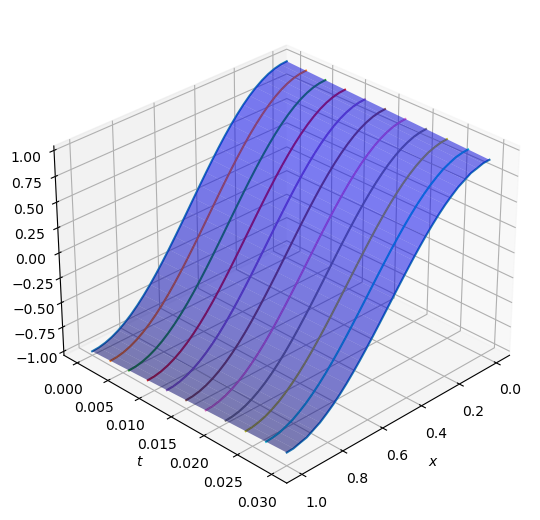

In [8]:
# Plotting true solution vs approximated solution

true_u = lambda x, t: np.exp(-np.pi*t)*np.cos(np.pi*x)

X, T = np.meshgrid(x, t, indexing = 'ij')
true_solution = true_u(X, T)

fig, ax = plt.subplots(1,1, figsize=(6.5, 6.5), subplot_kw={'projection':'3d'})

for j in range(K+1):
    ax.plot(x, t[j]*np.ones(N+2), w[:, j])

# Change the angle of projection
ax.plot_surface(X, T, true_solution, color='blue', alpha=0.5, label='True Solution')

ax.set_xlabel('$x$')
ax.set_ylabel('$t$')
ax.view_init(elev=30, azim=45)

plt.show()